# Part-1

# 0.0 Imports

In [14]:
#necessary library imports
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import itertools as itools
import numpy as np
import io
import pandas as pd
from collections import Counter
import seaborn as sns
pd.set_option('display.max_colwidth', None) 

#necessary library imports
import networkx as nx
import matplotlib.pyplot as plt
import community
from collections import defaultdict
import random

import warnings
warnings.filterwarnings('ignore')

# 1.0 Preliminary Analysis

## 1.1 Parsing data 

In [2]:
# Create empty lists for each column
src_list = []
tgt_list = []
vot_list = []
res_list = []
yea_list = []
dat_list = []
txt_list = []


# Read the text file line by line
with open('wiki-RfA.txt', 'r', encoding = "utf-8") as f:
    for line in f:
        
        # Extract the SRC, TGT, and TXT columns from each line
        if line.startswith('SRC:'):
            src_list.append(line.strip()[4:])
        elif line.startswith('TGT:'):
            tgt_list.append(line.strip()[4:])
        elif line.startswith('VOT:'):
            vot_list.append(line.strip()[4:])
        elif line.startswith('RES:'):
            res_list.append(line.strip()[4:])
        elif line.startswith('YEA:'):
            yea_list.append(line.strip()[4:])
        elif line.startswith('DAT:'):
            dat_list.append(line.strip()[4:])
        elif line.startswith('TXT:'):
            txt_list.append(line.strip()[4:])

# Create a Pandas dataframe with the extracted columns
df = pd.DataFrame({'SRC': src_list, 'TGT': tgt_list, 'VOT':vot_list, 'RES':res_list, 'YEA':yea_list, 'DAT':dat_list,'TXT': txt_list})

In [3]:
df.head()

SRC  TGT VOT RES   YEA                   DAT  \
0   Steel1943  BDD   1   1  2013  23:13, 19 April 2013   
1  Cuchullain  BDD   1   1  2013  01:04, 20 April 2013   
2   INeverCry  BDD   1   1  2013  23:43, 19 April 2013   
3   Cncmaster  BDD   1   1  2013  00:11, 20 April 2013   
4  Miniapolis  BDD   1   1  2013  00:56, 20 April 2013   

                                                                                                                                                                                                              TXT  
0                                                                                                                                                                                        '''Support''' as co-nom.  
1                                                                                                                                                                                   '''Support''' as nominator.--  
2                                                                                                                                                                                         '''Support''' per noms.  
3                                                                              '''Support''' per noms. BDD is a strong contributor with thousands of edits and years of experience. I have no problem supporting.  
4  '''Support''', with great pleasure. I work with BDD at the [[WP:GOCE|Guild of Copy Editors]] (where we're both coordinators), and have seen their good work at RM and AfD. A fine addition to the admin corps.

## 1.2 Preliminary Analysis by year

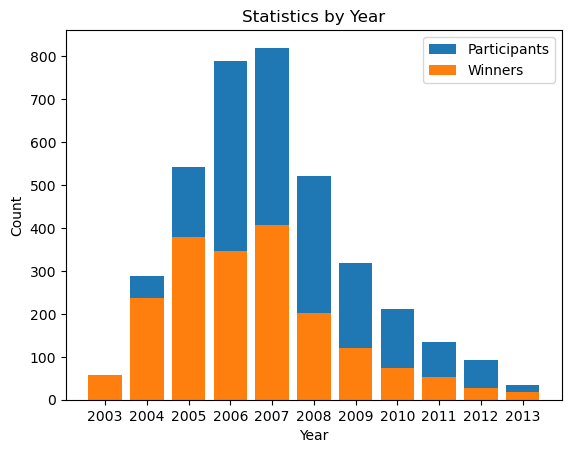

num_participants  num_voters  num_winners  total_votes  votes_per_person
YEA                                                                           
2003                58          57           58          203                 3
2004               289         641          236         6541                22
2005               543        1738          380        20239                37
2006               790        3259          347        45325                57
2007               820        3418          406        41541                50
2008               521        2727          201        30479                58
2009               319        2075          120        21375                67
2010               212        1594           75        13970                65
2011               134        1265           52         8556                63
2012                93        1072           28         6474                69
2013                35         796           19         3572               102

In [4]:
def stats_by_year(tdf):
    # Group the dataframe by year
    grouped = tdf.groupby('YEA')

    # Calculate the statistics for each year
    num_participants = grouped['TGT'].nunique()
    num_voters = grouped['SRC'].nunique()
    num_winners = grouped.apply(lambda x: x.loc[x['RES'] == '1', 'TGT'].nunique())
    total_votes = grouped['VOT'].size()
    votes_pp = total_votes//num_participants

    # Create a new dataframe with the statistics for each year
    stats_by_year = pd.DataFrame({'num_participants': num_participants,
                                  'num_voters':num_voters,
                                  'num_winners': num_winners,
                                  'total_votes': total_votes,
                                 'votes_per_person' : votes_pp})

    return stats_by_year

# Get the statistics for each year
stats = stats_by_year(df)

# Create the bar plot
plt.bar(stats.index, stats['num_participants'], label='Participants')
plt.bar(stats.index, stats['num_winners'], label='Winners')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Statistics by Year')
plt.show()

stats_by_year(df)

## 1.3 Visualizing three years data

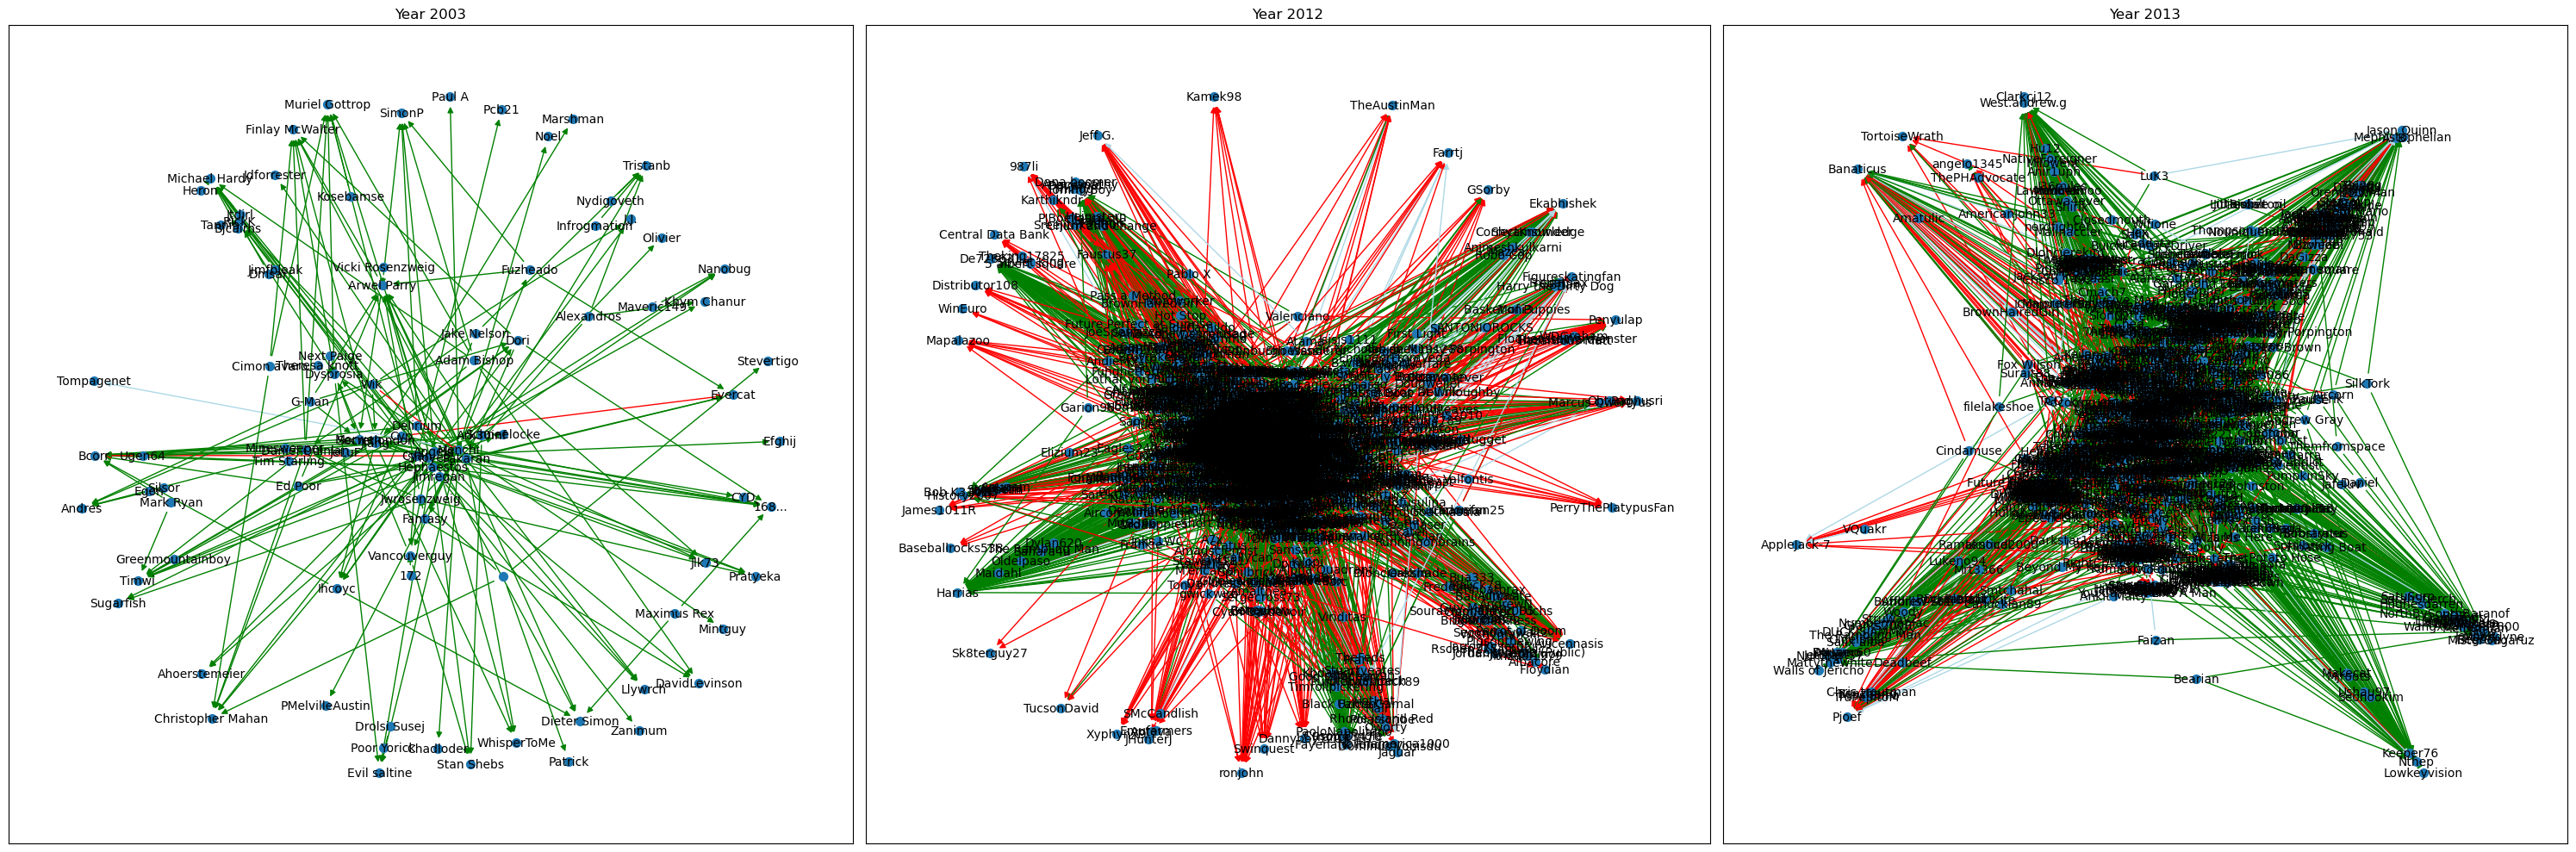

In [60]:
# Create subplots for 3 graphs stacked on top of each other
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Plot the graph for year 2003
graph_2003_df = df.loc[df['YEA'] == '2003']
graph_2003 = nx.from_pandas_edgelist(graph_2003_df, source='SRC', target='TGT', create_using=nx.DiGraph())
pos = nx.spring_layout(graph_2003)
edge_colors_2003 = ['g' if graph_2003_df.loc[(graph_2003_df['SRC']==src) & (graph_2003_df['TGT']==tgt), 'VOT'].iloc[0] == '1' else 'r' if graph_2003_df.loc[(graph_2003_df['SRC']==src) & (graph_2003_df['TGT']==tgt), 'VOT'].iloc[0] == '-1' else 'lightblue' for src, tgt, data in graph_2003.edges(data=True)]
nx.draw_networkx_nodes(graph_2003, pos=pos, node_size=50, ax=axes[0])
nx.draw_networkx_edges(graph_2003, pos=pos, edge_color=edge_colors_2003, ax=axes[0])
nx.draw_networkx_labels(graph_2003, pos=pos, font_size=10, font_color='black', ax=axes[0])
axes[0].set_title('Year 2003')

# Plot the graph for year 2012
graph_2012_df = df.loc[df['YEA'] == '2012']
graph_2012 = nx.from_pandas_edgelist(graph_2012_df, source='SRC', target='TGT', create_using=nx.DiGraph())
pos = nx.spring_layout(graph_2012)
edge_colors_2012 = ['g' if graph_2012_df.loc[(graph_2012_df['SRC']==src) & (graph_2012_df['TGT']==tgt), 'VOT'].iloc[0] == '1' else 'r' if graph_2012_df.loc[(graph_2012_df['SRC']==src) & (graph_2012_df['TGT']==tgt), 'VOT'].iloc[0] == '-1' else 'lightblue' for src, tgt, data in graph_2012.edges(data=True)]
nx.draw_networkx_nodes(graph_2012, pos=pos, node_size=50, ax=axes[1])
nx.draw_networkx_edges(graph_2012, pos=pos, edge_color=edge_colors_2012, ax=axes[1])
nx.draw_networkx_labels(graph_2012, pos=pos, font_size=10, font_color='black', ax=axes[1])
axes[1].set_title('Year 2012')

# Plot the graph for year 2013
graph_2013_df = df.loc[df['YEA'] == '2013']
graph_2013 = nx.from_pandas_edgelist(graph_2013_df, source='SRC', target='TGT', create_using=nx.DiGraph())
pos = nx.spring_layout(graph_2013)
edge_colors_2013 = ['g' if graph_2013_df.loc[(graph_2013_df['SRC']==src) & (graph_2013_df['TGT']==tgt), 'VOT'].iloc[0] == '1' else 'r' if graph_2013_df.loc[(graph_2013_df['SRC']==src) & (graph_2013_df['TGT']==tgt), 'VOT'].iloc[0] == '-1' else 'lightblue' for src, tgt, data in graph_2013.edges(data=True)]
nx.draw_networkx_nodes(graph_2013, pos=pos, node_size=50, ax=axes[2])
nx.draw_networkx_edges(graph_2013, pos=pos, edge_color=edge_colors_2013, ax=axes[2])
nx.draw_networkx_labels(graph_2013, pos=pos, font_size=10, font_color='black', ax=axes[2])
axes[2].set_title('Year 2013')

# Show the plot
plt.tight_layout()
plt.show()


## 1.4 2013 Data

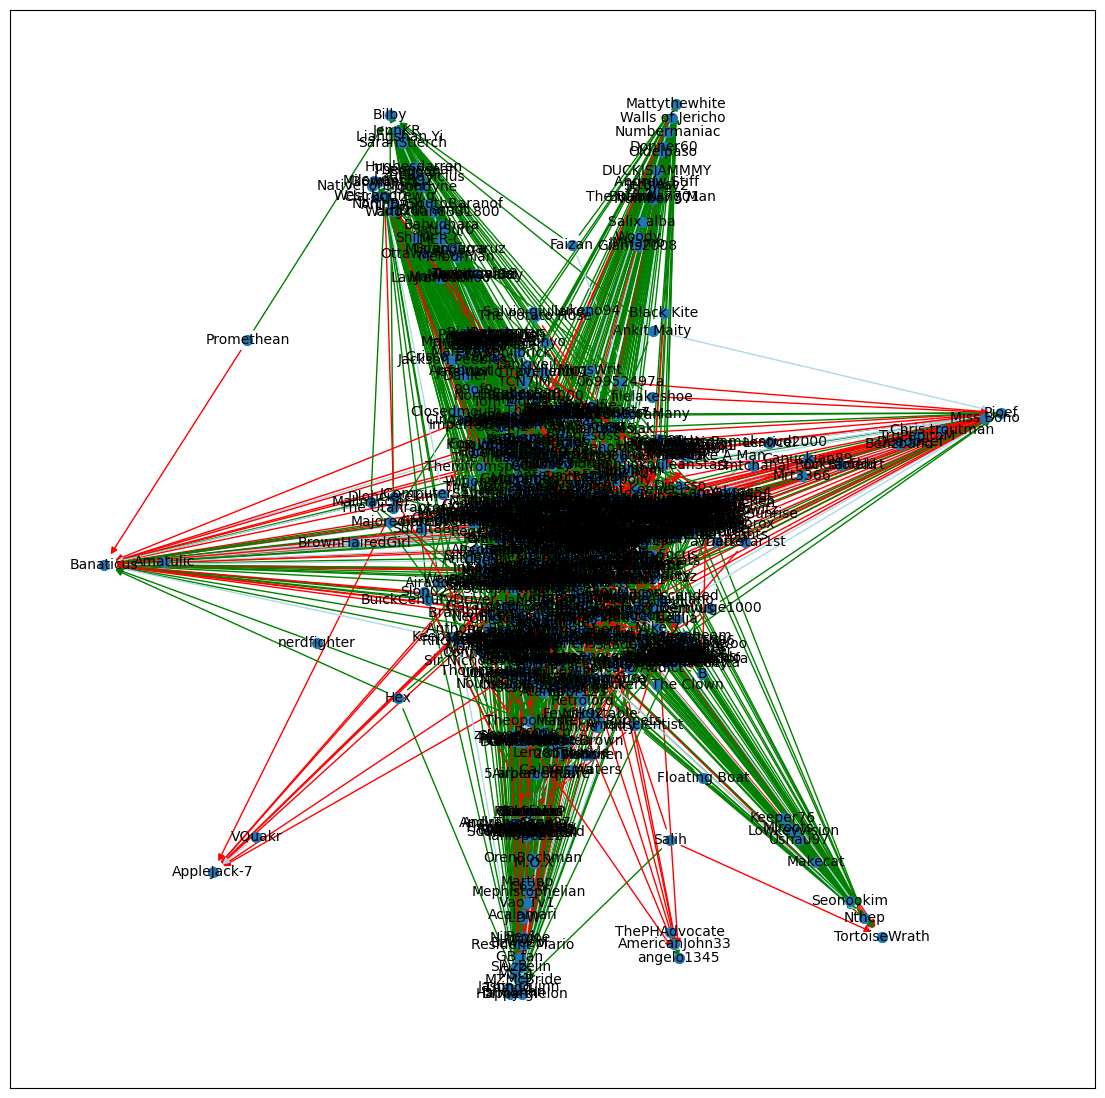

In [7]:
# 2013 year graph
graph_2013_df = df.loc[df['YEA'] == '2013']
graph_2013 = nx.from_pandas_edgelist(graph_2013_df, source='SRC', target='TGT', create_using=nx.DiGraph())

# define edge colors based on the 'vot' value
edge_colors = []
for (src, tgt, data) in graph_2013.edges(data=True):
    if graph_2013_df.loc[(graph_2013_df['SRC']==src) & (graph_2013_df['TGT']==tgt), 'VOT'].iloc[0] == '1':
        edge_colors.append('g')
    elif graph_2013_df.loc[(graph_2013_df['SRC']==src) & (graph_2013_df['TGT']==tgt), 'VOT'].iloc[0] == '-1':
        edge_colors.append('r')
    else:
        edge_colors.append('lightblue')
        
# draw the graph with colored edges and labeled nodes
plt.figure(3, figsize=(14, 14)) 
pos = nx.spring_layout(graph_2013)
nx.draw_networkx_nodes(graph_2013, pos=pos, node_size=50)
nx.draw_networkx_edges(graph_2013, pos=pos, edge_color=edge_colors)
nx.draw_networkx_labels(graph_2013, pos=pos, font_size=10, font_color='black')
plt.show()

In [15]:
graph_2013_df = df.loc[df['YEA'] == '2013']
graph_2013 = nx.from_pandas_edgelist(graph_2013_df, source='SRC', target='TGT', create_using=nx.DiGraph())
graph = graph_2013

## 1.5 Basic Analysis

In [77]:
#Basic description of the 2013 network
print("Is the graph directed >> ", graph.is_directed())
print("Number of edges in the graph >> ", graph.number_of_edges())
print("Number of nodes in the graph >> ", graph.number_of_nodes())
#print("Diameter of the graph >> ", nx.diameter(graph_2003))
print("Average shortest paths in the network >> ", nx.average_shortest_path_length(graph))

Is the graph directed >>  True
Number of edges in the graph >>  3568
Number of nodes in the graph >>  806
Average shortest paths in the network >>  0.09631028158377387


## 1.6 More Analysis on voting ratio

In [157]:
def calculate_threshold_for_years(df):
    threshold_dict = {}

    for year in range(2003, 2014):
        
        if year in [2003,2006,2007]:
            continue
            
        filtered_df = df[df['YEA'] == str(year)]

        # Group by 'TGT' (target) and calculate the counts of different vote types
        grouped_df = filtered_df.groupby('TGT')['VOT'].value_counts().unstack(fill_value=0)

        # Calculate the voting ratio
        grouped_df['Voting_Ratio'] = grouped_df['1'] / (grouped_df[['1','-1', '0']].sum(axis=1))

        # Merge the grouped dataframe with the original dataframe to retrieve the corresponding 'RES' (outcome) for each target
        result_df = pd.merge(grouped_df, filtered_df[['TGT', 'RES']].drop_duplicates(), on='TGT', how='left')

        # Get the threshold value for being 'RES' 1
        threshold = result_df[result_df['RES'] == '1']['Voting_Ratio'].min()

        threshold_dict[year] = threshold

    # Plotting
    plt.plot(threshold_dict.keys(), threshold_dict.values())

    plt.xlabel('Years')
    plt.ylabel('Threshold')
    plt.title('Threshold voting ratio graph for each year')
    plt.show()

    return threshold_dict

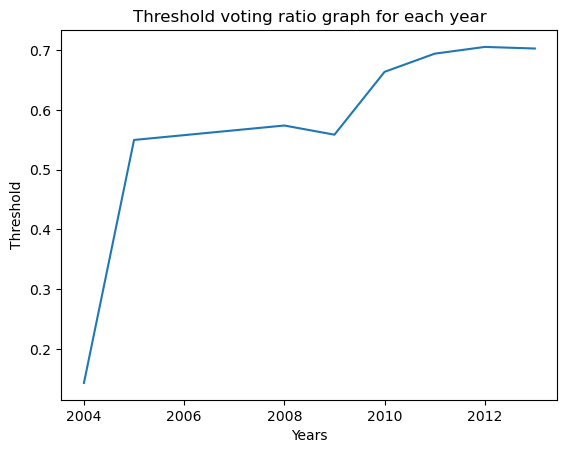

In [158]:
threshold_values = calculate_threshold_for_years(df)

In [159]:
threshold_values

{2004: 0.14285714285714285,
 2005: 0.55,
 2008: 0.5741935483870968,
 2009: 0.5588235294117647,
 2010: 0.6641221374045801,
 2011: 0.694560669456067,
 2012: 0.7058823529411765,
 2013: 0.7032258064516129}

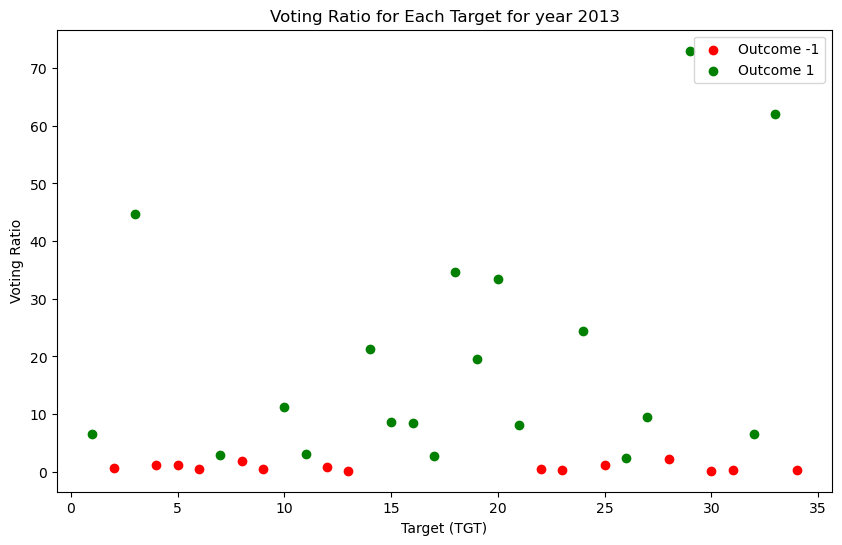

In [161]:
filtered_df = df[df['YEA'] == '2013']

# Group by 'TGT' (target) and calculate the counts of different vote types
grouped_df = filtered_df.groupby('TGT')['VOT'].value_counts().unstack(fill_value=0)

# Calculate the voting ratio
grouped_df['Voting Ratio'] = grouped_df['1'] / (grouped_df['-1'] + grouped_df['0'])

# Merge the grouped dataframe with the original dataframe to retrieve the corresponding 'RES' (outcome) for each target
result_df = pd.merge(grouped_df, filtered_df[['TGT', 'RES']].drop_duplicates(), on='TGT', how='left')

result_df = result_df[1:]

# Create a color mapping dictionary for different 'RES' values
color_map = {'1': 'green', '-1': 'red'}

# Plot the voting ratio for each target with different colors for 'RES' values
plt.figure(figsize=(10, 6))
for res, group in result_df.groupby('RES'):
    plt.scatter(group.index, group['Voting Ratio'], color=color_map[res], label='Outcome {}'.format(res))

plt.xlabel('Target (TGT)')
plt.ylabel('Voting Ratio')
plt.title('Voting Ratio for Each Target for year 2013')
plt.legend()
plt.show()


# 2.0 Centrality analysis

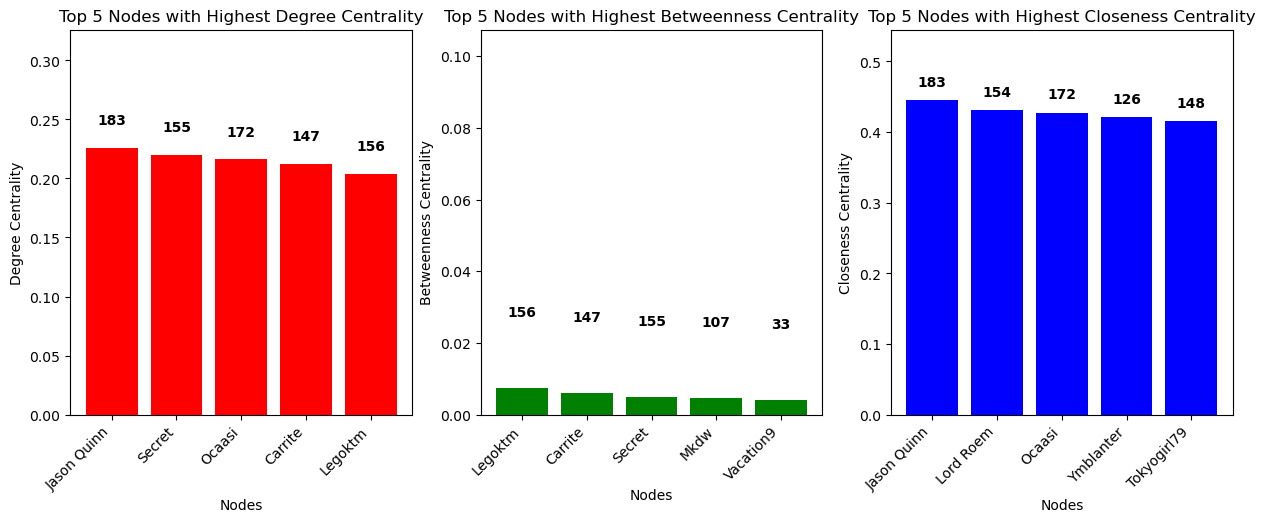

In [78]:
# Calculate degree centrality, betweenness centrality, and closeness centrality
degree_centrality_dict = nx.degree_centrality(graph)
betweenness_centrality_dict = nx.betweenness_centrality(graph)
closeness_centrality_dict = nx.closeness_centrality(graph)

# Get the top 5 nodes with highest degree centrality, betweenness centrality, and closeness centrality
degree_top_nodes = sorted(degree_centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]
betweenness_top_nodes = sorted(betweenness_centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]
closeness_top_nodes = sorted(closeness_centrality_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Create a dictionary to store the number of votes for each top node
votes_dict = {node[0]: graph_2013_df['TGT'].value_counts()[node[0]] for node in degree_top_nodes + betweenness_top_nodes + closeness_top_nodes}

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Create a bar chart for degree centrality
axs[0].bar([node[0] for node in degree_top_nodes], [node[1] for node in degree_top_nodes], color='r')
axs[0].set_xticklabels([node[0] for node in degree_top_nodes], rotation=45, ha='right')
axs[0].set_xlabel("Nodes")
axs[0].set_ylabel("Degree Centrality")
axs[0].set_title("Top 5 Nodes with Highest Degree Centrality")
axs[0].set_ylim(0, max(degree_centrality_dict.values())+0.1)

# Add the number of votes as a label to each bar
for i, node in enumerate(degree_top_nodes):
    axs[0].text(i, node[1]+0.02, votes_dict[node[0]], ha='center', fontweight='bold')

# Create a bar chart for betweenness centrality
axs[1].bar([node[0] for node in betweenness_top_nodes], [node[1] for node in betweenness_top_nodes], color='g')
axs[1].set_xticklabels([node[0] for node in betweenness_top_nodes], rotation=45, ha='right')
axs[1].set_xlabel("Nodes")
axs[1].set_ylabel("Betweenness Centrality")
axs[1].set_title("Top 5 Nodes with Highest Betweenness Centrality")
axs[1].set_ylim(0, max(betweenness_centrality_dict.values())+0.1)

# Add the number of votes as a label to each bar
for i, node in enumerate(betweenness_top_nodes):
    axs[1].text(i, node[1]+0.02, votes_dict[node[0]], ha='center', fontweight='bold')

# Create a bar chart for closeness centrality
axs[2].bar([node[0] for node in closeness_top_nodes], [node[1] for node in closeness_top_nodes], color='b')
axs[2].set_xticklabels([node[0] for node in closeness_top_nodes], rotation=45, ha='right')
axs[2].set_xlabel("Nodes")
axs[2].set_ylabel("Closeness Centrality")
axs[2].set_title("Top 5 Nodes with Highest Closeness Centrality")
axs[2].set_ylim(0, max(closeness_centrality_dict.values())+0.1)

# Add the number of votes as a label to each bar
for i, node in enumerate(closeness_top_nodes):
    axs[2].text(i, node[1]+0.02, votes_dict[node[0]], ha='center', fontweight='bold')


# 3.0 Clustering Coefficient Analysis

In [79]:
#average clustering coefficient
avg_clus_coeff = nx.average_clustering(graph)
print("Average Clustering Coefficient >> ", avg_clus_coeff)

Average Clustering Coefficient >>  0.1683828530913799


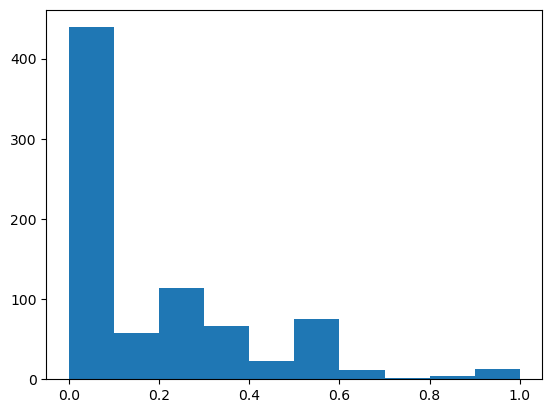

In [75]:
#plotting the histogram values
c = nx.cluster.clustering(graph)
plt.hist(c.values());

## 4.0 Visuvalization

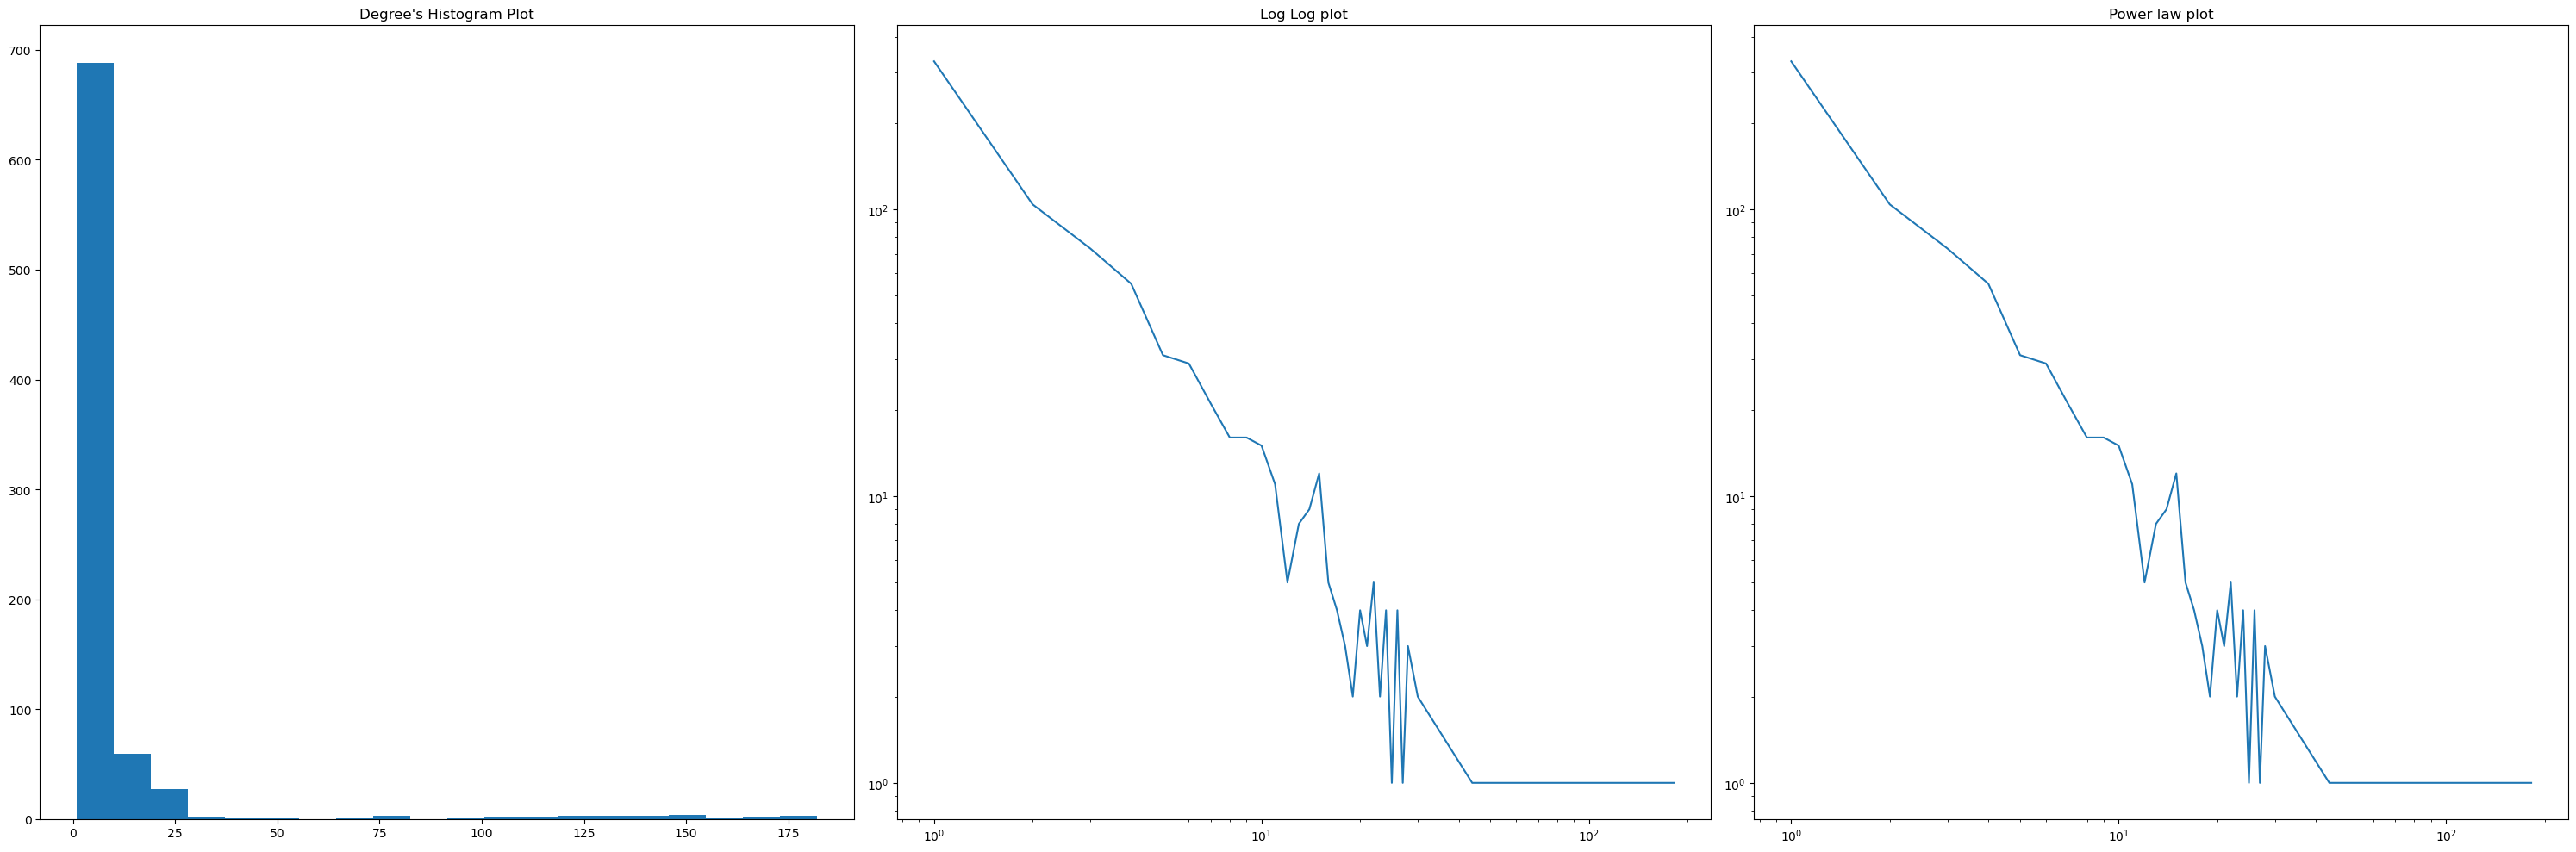

In [81]:
# Create subplots for 3 graphs stacked on top of each other
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Histogram plot
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True) 
plt.subplot(1, 3, 1)
plt.hist(degree_sequence, bins=20)
plt.title("Degree's Histogram Plot")

# Log-log plot
degrees_list = [degree for node, degree in graph.degree]
frequency_degree = sorted(Counter(degrees_list).items())
plt.subplot(1, 3, 2)
plt.loglog([d[0] for d in frequency_degree], [d[1] for d in frequency_degree])
plt.title('Log Log plot')

# Power law plot
plt.subplot(1, 3, 3)
plt.plot([d[0] for d in frequency_degree], [d[1] for d in frequency_degree])
plt.xscale('log')
plt.yscale('log')
plt.title("Power law plot")

# Show the plots
plt.tight_layout()
plt.show()

# 5.0 Small world network 

### First Condition

In [24]:
# L = Log(N) First Characteristic satisfied
L = nx.average_shortest_path_length(graph)
N = np.log(len(graph))
L, N

(0.09631028158377387, 6.692083742506628)

## Since L and LogN are not in same magnitude, we can conlclude that this type of network is not a small world network

## 6.0 Link Prediction

In [82]:
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Load the data into a networkx graph
graph_2013_df = df.loc[df['YEA'] == '2013']
graph_2013 = nx.from_pandas_edgelist(graph_2013_df, source='SRC', target='TGT', create_using=nx.DiGraph())
G = graph_2013
# Split the data into training and test sets
#train_edges, test_edges = train_test_split(G.edges(), test_size=0.2, random_state=42)

# Create a new graph with only the training edges
G_train = G.edge_subgraph(G.edges())

# Calculate the Jaccard similarity for all pairs of nodes in the test set
jaccard_scores = []
for edge in G.edges():
    source_neighbors = set(G_train.neighbors(edge[0]))
    target_neighbors = set(G_train.neighbors(edge[1]))
    score = len(source_neighbors.intersection(target_neighbors)) / len(source_neighbors.union(target_neighbors))
    jaccard_scores.append(score)

# Convert the scores to predictions (1 if score > 0.5, 0 otherwise)
predictions = [1 if score > 0.5 else 0 for score in jaccard_scores]

# Calculate the accuracy and ROC AUC score of the predictions
y_true = [1] * len(predictions)
accuracy = accuracy_score(y_true, predictions)

print("Accuracy:", accuracy*100)

#Link prediction didn't work
'''
Link prediction in the context of your data would involve predicting whether a particular user (source) is likely to
vote for a particular candidate (target) in an upcoming election. 
'''

Accuracy: 4.063901345291479


'\nLink prediction in the context of your data would involve predicting whether a particular user (source) is likely to\nvote for a particular candidate (target) in an upcoming election. \n'

## 7.0 Modularity and community Analysis

Modularity is the measure of strength of the graph. Networks with high modularity have dense connections within the modules whereas sparse connections between nodes in different modules.

In [10]:
# 2013 year graph
graph_2013_df = df.loc[df['YEA'] == '2013']
graph_2013 = nx.from_pandas_edgelist(graph_2013_df, source='SRC', target='TGT')
graph = graph_2013

#Finding the number of dendrograms
dendrogram = community.generate_dendrogram(graph)
print("# of dendograms in the network -> ", len(dendrogram))

# of dendograms in the network ->  3


In [11]:
print("Paritition and community details of each level :")

#modularity analysis of each level
for level in range(len(dendrogram)):
    comm_details = community.partition_at_level(dendrogram, level)
    print()
    print("Partitions at level : ", level)
    print('# of communities in the level -> ', len(set(comm_details.values())))
    print('Modularity of the level -> ', community.modularity(comm_details, graph))

Paritition and community details of each level :

Partitions at level :  0
# of communities in the level ->  33
Modularity of the level ->  0.19466264344401032

Partitions at level :  1
# of communities in the level ->  10
Modularity of the level ->  0.22168031174779898

Partitions at level :  2
# of communities in the level ->  8
Modularity of the level ->  0.22321000283844544


In [12]:
#looping through each level
for level in range(len(dendrogram)) :
    
    # details of community at each level
    print()
    print("Level : ", level)
    print()
    comm_details = community.partition_at_level(dendrogram, level)
    print('# of communities -> ', len(set(comm_details.values())))
    
    # storing the deatils of nodes in defaultdict for easy access
    communities = defaultdict(list)
    communities_len = defaultdict(lambda : 0)
    
    # filling the dictionaty
    for node, communityID in comm_details.items() :
        communities[communityID].append(node)
        communities_len[communityID] = communities_len[communityID] + 1
    
    # sorting it based on number of items
    sorted_dict = sorted(communities_len.items(), key = lambda x: (x[1], x[0]), reverse=True)
    
    # filtering the top 2 dictionary
    top_2 = [ s[0] for s in sorted_dict[:2] ]
    print( 'Top 2 communities by size')
    
    for communityID in top_2:
        print()
        sub_network = nx.subgraph(graph, communities[communityID])
        print('# of nodes -> ', sub_network.number_of_nodes())
        print('# of edges -> ', sub_network.number_of_edges())
        print('Diameter of the network -> ' , nx.diameter(sub_network))
        print('Density of the network ->', nx.density(sub_network))
        print('Average Shortest Path Length -> ', nx.average_shortest_path_length(sub_network))
        print('Average Clustering coefficient ->',nx.average_clustering(sub_network))
    print()


Level :  0

# of communities ->  33
Top 2 communities by size

# of nodes ->  58
# of edges ->  85
Diameter of the network ->  3
Density of the network -> 0.0514216575922565
Average Shortest Path Length ->  2.0181488203266786
Average Clustering coefficient -> 0.4839832243483359

# of nodes ->  40
# of edges ->  39
Diameter of the network ->  2
Density of the network -> 0.05
Average Shortest Path Length ->  1.95
Average Clustering coefficient -> 0.0


Level :  1

# of communities ->  10
Top 2 communities by size

# of nodes ->  244
# of edges ->  516
Diameter of the network ->  4
Density of the network -> 0.017405383525602103
Average Shortest Path Length ->  2.6769547325102883
Average Clustering coefficient -> 0.24987872938186537

# of nodes ->  89
# of edges ->  147
Diameter of the network ->  4
Density of the network -> 0.037538304392236974
Average Shortest Path Length ->  2.664708886618999
Average Clustering coefficient -> 0.03247224725230941


Level :  2

# of communities ->  8
Top

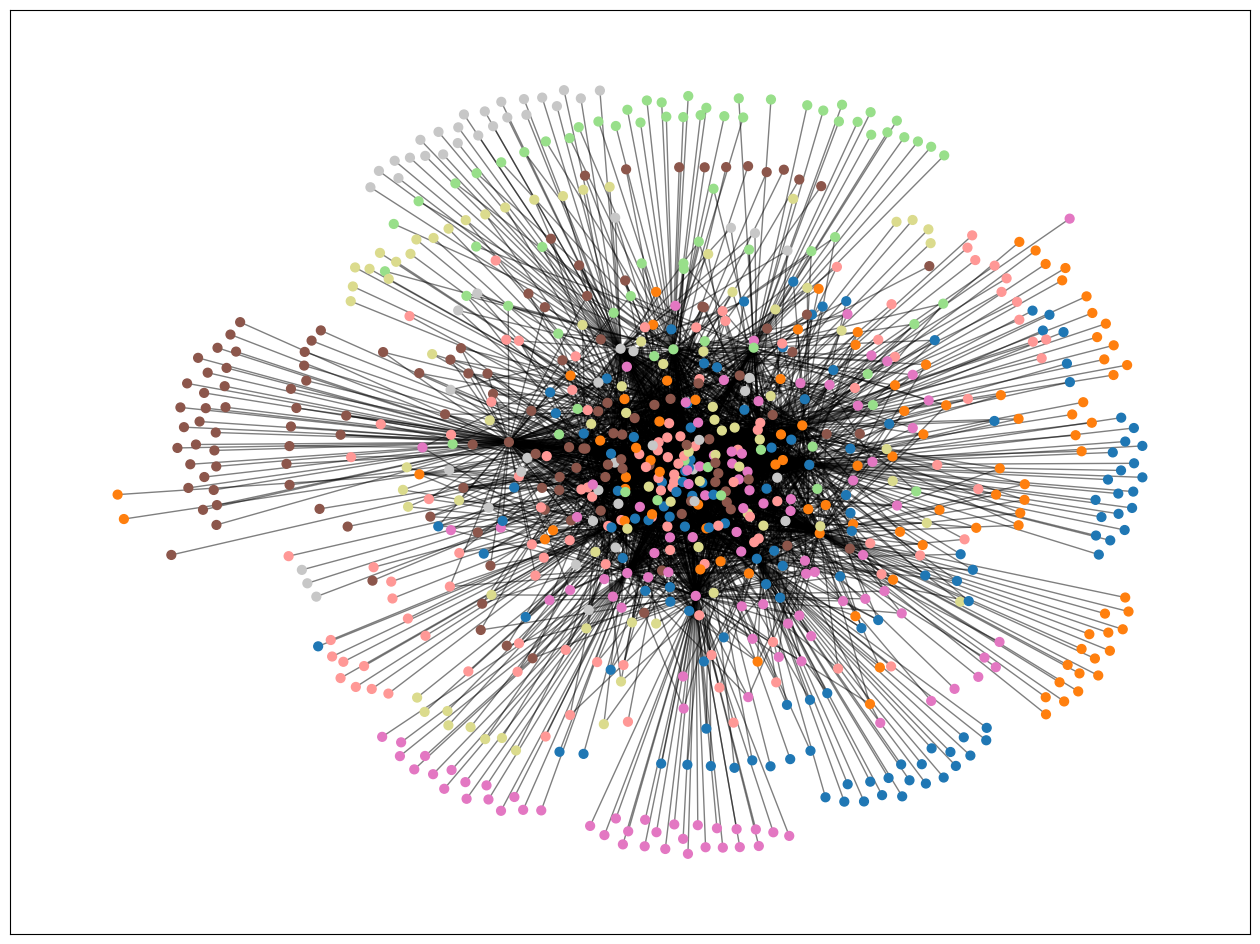

In [13]:
plt.figure(figsize=(16, 12))
partition = community.best_partition(graph)
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
node_list = [n for n, n_com in sorted(partition.items())]
node_colors = [n_com for n, n_com in sorted(partition.items())]
nx.draw_networkx_nodes(graph, pos, node_list, node_size=40, vmin=0, vmax=size, node_color=node_colors, cmap=plt.cm.tab20)
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.show()